# Question: 1

In this question, you are tasked with enhancing the resolution of a video. The goal is to improve the quality of individual frames. You are expected to use basic algorithms for achieving this goal.

### Task 1: Frame Extraction

Extract frames from the video using OpenCV.

### Task 2: Resolution Enhancement

Apply the following enhancement algorithms to scale the extracted frames by a factor of 2:

1) Nearest-neighbor Interpolation <br>
2) Bilinear Interpolation <br>
3) Bicubic Interpolation <br>

Explore these approaches by your self. These are just builtin parameters in resize function.
https://theailearner.com/2018/11/15/image-interpolation-using-opencv-python/

### Task 3: Video Reconstruction

After enhancing the frames, reconstruct the video by merging the enhanced frames while ensuring that the frame rate of the reconstructed video matches that of the original video. Generate a separate video for each interpolation method.

<b>Bonus</b>: Apply a self-selected algorithm to improve video quality.

In [5]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt
import IPython.display as ipd

In [2]:
ipd.Video('Q1.mp4')

## Nearest-neighbor Interpolation 

In [3]:
vid = cv2.VideoCapture('Q1.mp4')

# Get video properties
fps = vid.get(cv2.CAP_PROP_FPS)
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('nnInterpolation.mp4', fourcc, fps, (width*2, height*2))

for frame_num in range(5000):
    ret, frame = vid.read()
    if not ret:
        break
        
    resized_frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)
    out.write(resized_frame)
vid.release()
out.release()
cv2.destroyAllWindows()


## Bilinear Interpolation

In [6]:
vid = cv2.VideoCapture('Q1.mp4')

# Get video properties
fps = vid.get(cv2.CAP_PROP_FPS)
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('bilinear.mp4', fourcc, fps, (width*2, height*2))

for frame_num in range(5000):
    ret, frame = vid.read()
    if not ret:
        break
        
    resized_frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
    out.write(resized_frame)
vid.release()
out.release()
cv2.destroyAllWindows()


## BiCubic Interpolation

In [ ]:
vid = cv2.VideoCapture('Q1.mp4')

# Get video properties
fps = vid.get(cv2.CAP_PROP_FPS)
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('bicubic.mp4', fourcc, fps, (width*2, height*2))

for frame_num in range(5000):
    ret, frame = vid.read()
    if not ret:
        break
        
    resized_frame = cv2.resize(frame, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    out.write(resized_frame)
vid.release()
out.release()
cv2.destroyAllWindows()


# Question: 2

In this question, you are tasked with enhancing the audio quality of the video. Follow the given procedure to increase audio quality.

### Step 1: Short-Time Fourier Transform (STFT)
Compute the Short-Time Fourier Transform (STFT) of the audio signal. This operation transforms the audio into the frequency domain over short time intervals.

### Step 2: Magnitude and Phase Extraction
From the STFT, get the magnitude and phase using the np.abs() and np.angle() functions.

### Step 3: Noise Profile Creation
Load the noisy audio and calculate its STFT and magnitude from the STFT. Afterward, compute the average magnitude of the audio along axis=1 to generate a noise profile. This profile is essential for identifying and removing noise.

### Step 4: Adjusting with a Hyperparameter
Multiply the noise profile array by a hyperparameter represented as alpha. Experiment with various values of alpha to fine-tune the results. A good starting point is to set alpha to 2.

### Step 5: Audio Denoising
Subtract the mean noise array from the original audio (You may need to adjust the dimensions of the mean noise array to match with original audio). Ensure that any negative values in the resulting array are replaced with 0. This step effectively reduces noise in the audio.

### Step 6: Incorporating Phase Information
Multiply the modified audio by the complex exponential of the phase information obtained in step 3, which can be expressed as np.exp(1.0j * phase).

### Step 7: Inverse Short-Time Fourier Transform (ISTFT)
Reconstruct the audio by performing the Inverse Short Time Fourier Transform (ISTFT) on the modified audio signal using librosa. Save the resulting audio file.

In [30]:
from scipy.io import wavfile
import librosa
import librosa.display
import IPython.display as ipd
ipd.Audio('Q2.wav')

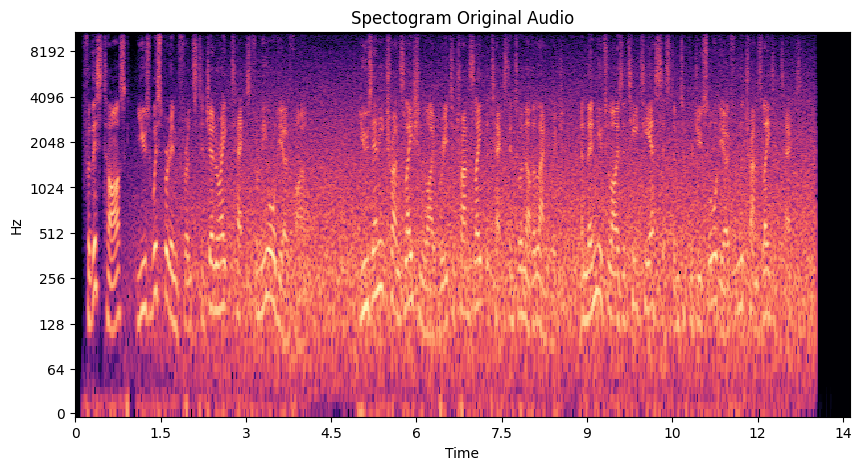

In [31]:
y, sr = librosa.load('Q2.wav')
audio_stft = librosa.stft(y)
audio_db = librosa.amplitude_to_db(np.abs(audio_stft), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(audio_db, x_axis='time', y_axis='log', ax=ax)
plt.title('Spectogram Original Audio')
plt.show()

In [32]:
original_magnitude = np.abs(audio_stft)
original_phase = np.angle(audio_stft)

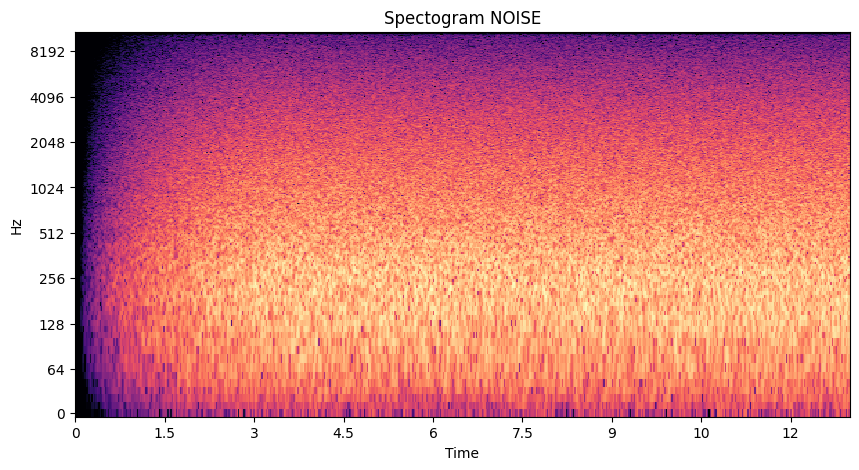

In [33]:
y, sr = librosa.load('Q2-Noise.wav')
noise_stft = librosa.stft(y)
noise_db = librosa.amplitude_to_db(np.abs(noise_stft), ref=np.max)
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(noise_db, x_axis='time', y_axis='log', ax=ax)
plt.title('Spectogram NOISE')
plt.show()

In [41]:
noise_magnitude = np.abs(noise_stft)
noise_profile = np.mean(noise_magnitude, axis=1)
alpha = 4 ## SET THIS ALPHA FOR NOISE TUNING
adjusted_noise_profile = alpha * noise_profile

In [49]:
# Denoising
denoise = original_magnitude - adjusted_noise_profile.reshape(-1, 1)
denoise = np.maximum(denoise, 0)
# Phase information and ISTFT
denoised_stft = denoise * np.exp(1.0j * original_phase)
denoised_audio = librosa.istft(denoised_stft)

In [50]:
ipd.Audio(denoised_audio, rate=sr)

# Question: 3

For this task, use whisper inference to generate text from the audio file. Use any translation library to translate the text into another language, and then utilize a TTS system to produce audio from the translated text. Supported Languages are :English, Urdu, Arabic

In [5]:
import whisper

# Model Options
# [tiny, base, small,	medium, large, large-v2]

model = whisper.load_model("base")
result = model.transcribe(r'C:\Users\Usman\Desktop\A5\Q3.wav')
text = result['text']

TypeError: argument of type 'NoneType' is not iterable